# Heart Disease Prediction Based on Machine Learning Proposal

*Mingjuan Ling; Dingzhe Zheng; Yifei Zhang; Emily Jiang*

## Introduction

Nowadays, the medical resources in the society are extremely strained, and most hospitals are overburdened. For patients, especially those suffering from serious diseases (such as heart disease), the consequences of a misdiagnosis are very serious, which has a great impact on both the hospital and the patient. This may lead to the improper occupation of medical resources in the hospital and may also cause a blow to the physical and mental health of the suspected patient and many other aspects.

Therefore, our team hopes to predict whether the suspected patient really has the disease and how accurate the diagnose results are by modeling and analyzing the data of multiple test indicators of existing suspected patients through various methods.

In this project we choose four algorithems we learned from our Big Data course , and choose to use data from Heart Disease UCI, to identify the optimal algorithm for the prediction of the heart disease. Four ML algorithms are **Random Forest, SVM, KNN, and Logistic regression** to do the prediction.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [0]:
df = pd.read_csv("/content/heart.csv")

In [0]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


From the table above, we can see the head of the dataset. This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4

**Explain of features**

The meaning of some of the column headers are following

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

##Data Exploration

To analyze this problem, our team make an initial assumption that the cholesterol and age maybe be the major factors in the model, this assumption is made from our life experience and intuition.

So we make some data exploration first to get some information of dataset's basic situation and the characterictics of some features.

First calculate the total number of different results (No or Yes) to know how many samples have Heart disease and how many don't have.

In [0]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Make a table chart for the visualization of the targets' statistical information.

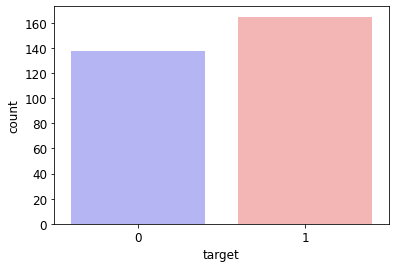

In [0]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

Caculate the mean value of parameters for each kind of target to see the differences in each features for two classes of target.

There were significant differences in some characteristics between the samples diagnosed with and without the disease, while there were no significant differences in others.

In [0]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


As the initial assumption we made, the age feature may be an important feature to the final result(target), so we conduct analysis on the age feature.

**Age Analysis**

At here, in order to see more clear about the relationship between age and heart disease, we divide the range of age into three groups: elderly,middle-aged, young to conduct the best analtsis.

In [0]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

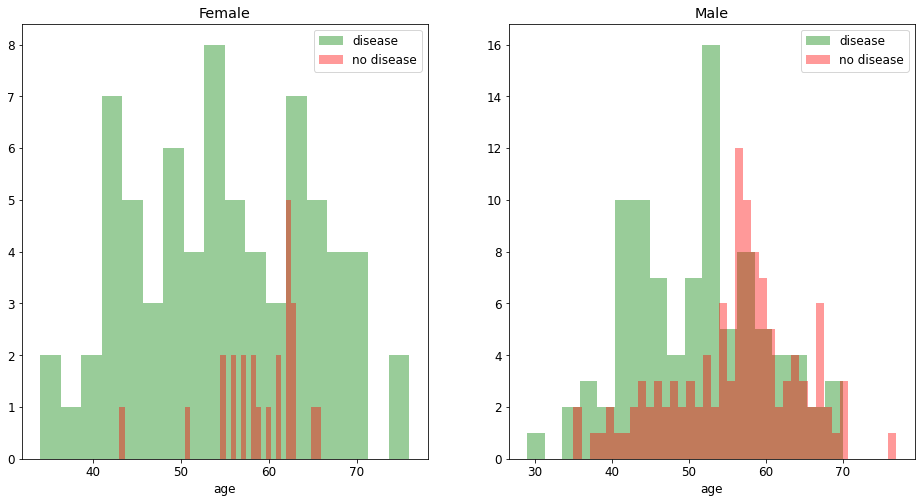

In [0]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = df[df['sex'] == 0]
men = df[df['sex'] == 1]

ax = sns.distplot(women[women['target'] == 1].age, bins=18, label = 'disease', ax = axes[0], kde =False, color="green")
ax = sns.distplot(women[women['target'] == 0].age, bins=40, label = 'no disease', ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['target']==1].age, bins=18, label = 'disease', ax = axes[1], kde = False, color="green")
ax = sns.distplot(men[men['target']==0].age, bins=40, label = 'no disease', ax = axes[1], kde = False, color="red")
ax.legend()
ax.set_title('Male');

According to our analysis above, we can conclude clearly from the three pie charts that the risk of heart disease increased significantly with age both for male and female.

**Cholesterol Analysis**

Cholesterol is also an important feature based on our assumption and cholesterol is widely regarded as an important indicator to a person's health situation, so we conduct exploration analysis on this feature.

In [0]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

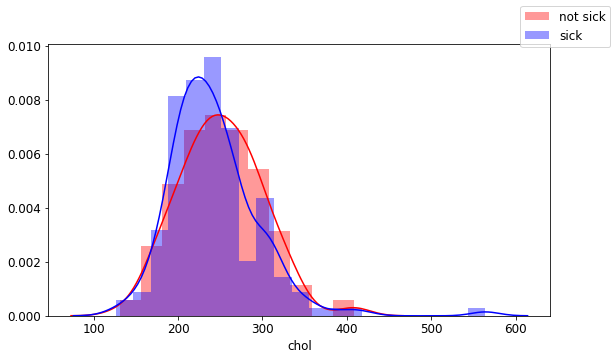

In [0]:
ax, figure = plt.subplots(figsize = [9,5])
sns.distplot(df[df['target'] == 0].chol, label = "not sick", color = 'r');
sns.distplot(df[df['target'] == 1].chol, label = "sick", color = 'b');
ax.legend()

Surprisingly, contrary to our earlier hypothesis, people with cholesterol did not show a higher risk of heart disease.

From the above data exploration process, we have gained some evidence to judge our assumptions and found that simpliy conclude from data's description and our life experience, the conclusion may not be dependable. So we need to leverage Machine Learning algorithms to delve deeper into this questions and find a optimal approach to predict the heart disease. We will cover the **Classification Accuracy, Confusion Matrix, Area Under Curve(AUC), and F1 score** for the four algorithms to assess the quality of your machine learning models.

## Analysis

**Data Processing**

From here we start leveraging machine learning algorithms to build models and predict the result for a new sample. 

First we do data processing  by separating x and y

In [0]:
data_X=df.drop('target',axis=1)
data_Y=df['target']

We split the dataset into test set and train set.

In [0]:
X_train,X_test,y_train,y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)

Next, in order to prevent the adverse effects of different orders of magnitude between different features, we regularize all the feature values.

In [0]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

We leveraged PCA to do dimension reduction

In [0]:
from sklearn.decomposition import PCA
pca=PCA().fit(X_train)

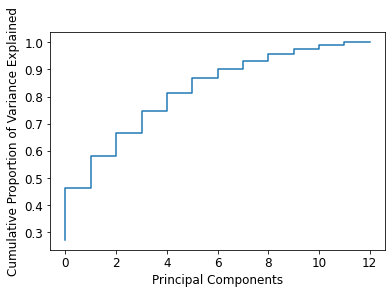

In [0]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()

Therefore, we choose a principal components number of 8.

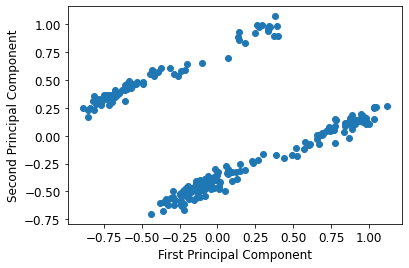

In [0]:
pca = PCA(n_components=8)
pca.fit(X_train)
reduced_data_train = pca.transform(X_train)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_train[:, 0], reduced_data_train[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

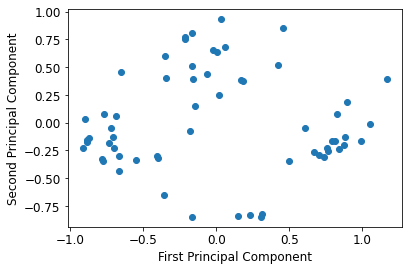

In [0]:
pca = PCA(n_components=8)
pca.fit(X_test)
reduced_data_test = pca.transform(X_test)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_test[:, 0], reduced_data_test[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

Here we use DecisionTreeCLassifier to help me to determine the most relavant features and least relavant features. In the later part, we will divide features into small groups and see which has the best and worst performance.

In [0]:
from sklearn import tree
clf_dtc = DecisionTreeClassifier(random_state=0)
clf_dtc.fit(X_train, y_train)
importances = clf_dtc.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
rank = []
for i in indices:
  rank.append(features[i])
rank

['fbs',
 'restecg',
 'thal',
 'thalach',
 'slope',
 'sex',
 'trestbps',
 'exang',
 'chol',
 'oldpeak',
 'ca',
 'age',
 'cp']

Finally we randomly created several combined feature groups. For the last two groups, we intentially choose the 3 features with the highest importance score and lowest importance score.

In [0]:
reduced_data_train = pd.DataFrame(reduced_data_train, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
reduced_data_test = pd.DataFrame(reduced_data_test, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
X_train=reduced_data_train
X_test=reduced_data_test

combine_features_list=[
    ('Dim1','Dim2','Dim3'),
    ('Dim4','Dim5','Dim6'),
    ('Dim7','Dim8','Dim1'),
    ('Dim5','Dim3','Dim2'),
    ('Dim7','Dim4','Dim1')
]

### Support Vector Classification

In [0]:
from sklearn.svm import SVC

clf_svm = SVC(gamma='auto',probability=True)
clf_svm.fit(X_train, y_train)
ypred_svm = clf_svm.predict(X_test)
print(classification_report(y_test, ypred_svm))
print(accuracy_score(y_test, ypred_svm))
print(metrics.f1_score(y_test, ypred_svm))
print('roc auc score is:', metrics.roc_auc_score(y_test, ypred_svm))


              precision    recall  f1-score   support

           0       0.78      0.72      0.75        29
           1       0.76      0.81      0.79        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

0.7704918032786885
0.787878787878788
roc auc score is: 0.7683189655172413


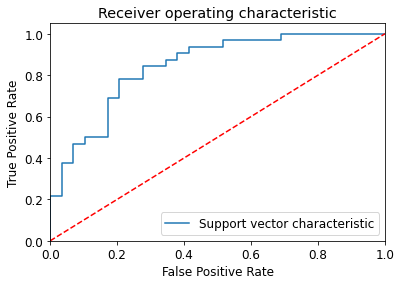

In [0]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, clf_svm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr_svm, tpr_svm, label='Support vector characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [0]:

parameters = [
{
    'random_state': [42],
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    dtr = GridSearchCV(SVC(), parameters, scoring='accuracy')
    
    dtr.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(dtr.best_params_)
    print("-"*50)
    predictions = [
    (dtr.predict(X_train_set), y_train, 'Train'),
    (dtr.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(features)
        print(pred[2] + ' Classification Report:')
        print("-"*50)
        print(classification_report(pred[1], pred[0]))
        print("-"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("-"*50)    
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'random_state': 42}
--------------------------------------------------
('Dim1', 'Dim2', 'Dim3')
Train Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       109
           1       0.78      0.82      0.80       133

    accuracy                           0.77       242
   macro avg       0.77      0.77      0.77       242
weighted avg       0.77      0.77      0.77       242

--------------------------------------------------
Train Confusion Matrix:
[[ 78  31]
 [ 24 109]]
**************************************************
('Dim1', 'Dim2', 'Dim3')
Test1 Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.69      0.71        29
           1       0.74      0.78      0.76        32

    ac

Indicators for the performance of **Support Vector Classification**:


*   The Accuracy of SVC is 0.77

*   The F1 Value of SVC is 0.79

*   The AUC Value for SVC is: 0.77



### **Random Forest**

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. 

Randon Tree Classification is an ensemble tree-based learning algorithm. The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object. It is a extension of Decision Tree to aviod overfitting and predict better.

We use Pre-Pruning method to avoid overfitting, and set the max depth of the tree to 4.

In [0]:
model = RandomForestClassifier(max_depth=4)
model.fit(X_train, y_train)
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

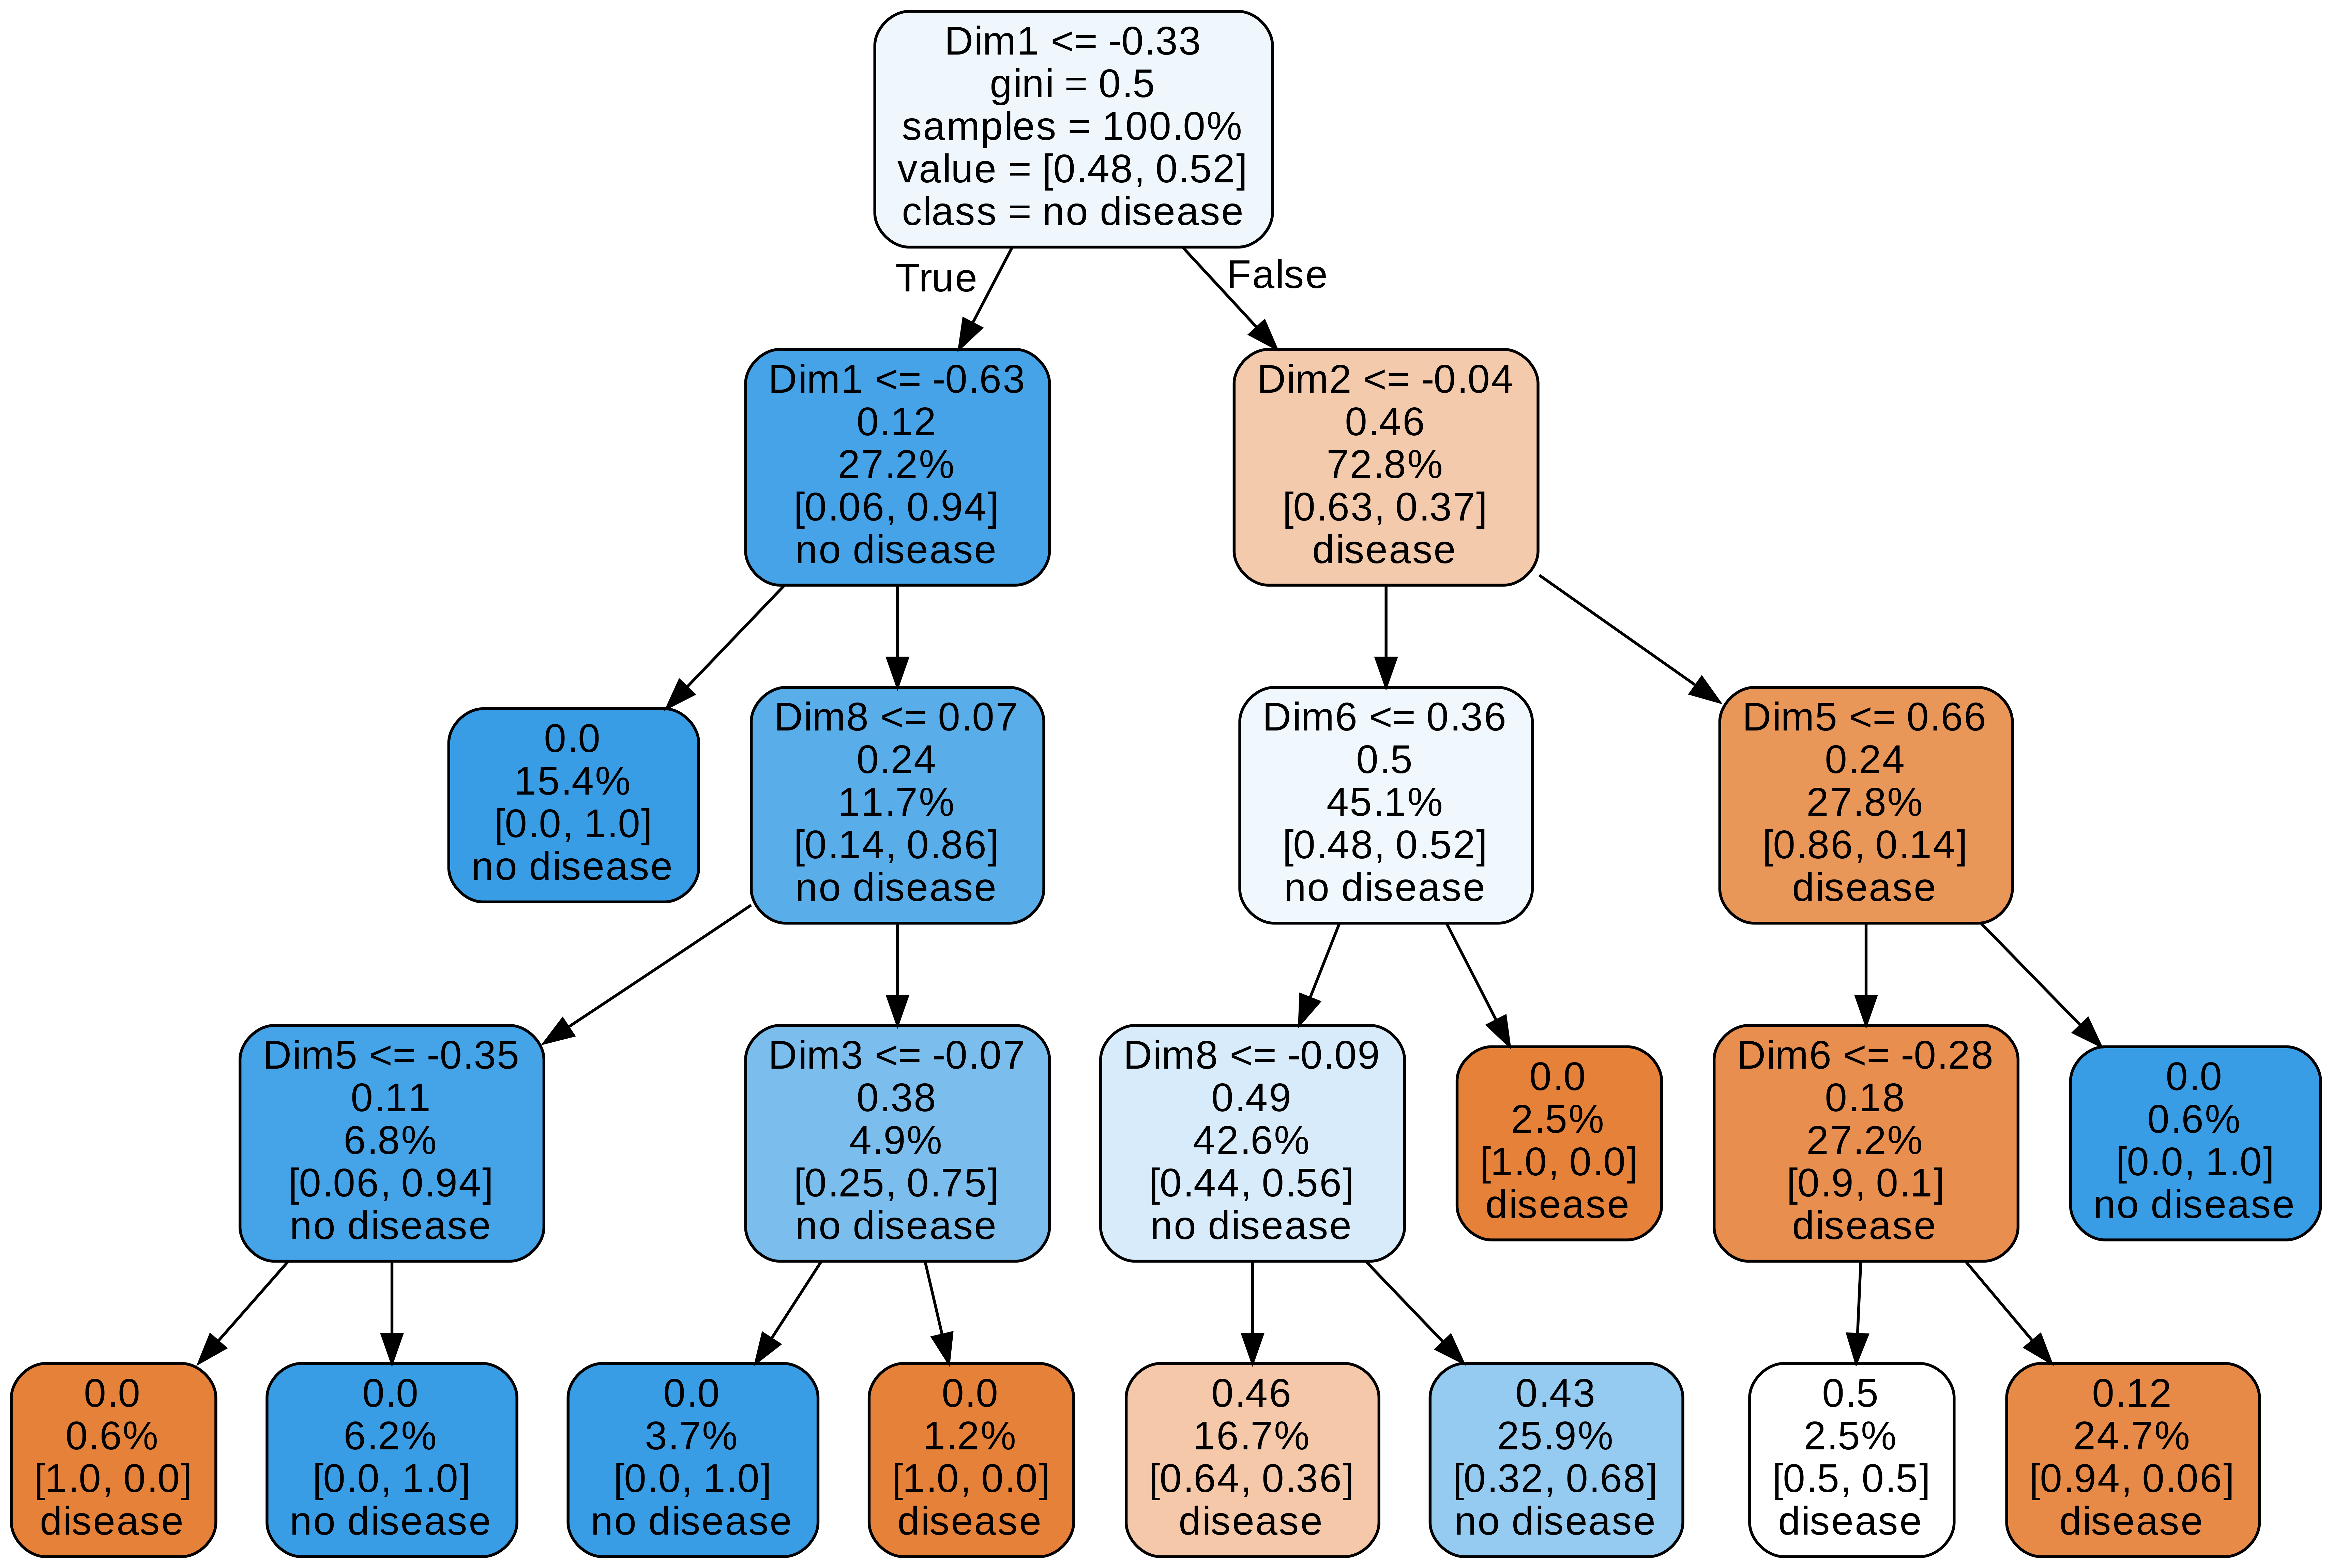

In [0]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

From the graph above, we can see a decision tree. Next, let's evaluate the model,

In [0]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred_bin)

0.7213114754098361

The **Accuracy** of Random Forest is 0.7705

In [0]:
metrics.f1_score(y_test, y_pred_bin, average='weighted')  

0.7199501746112952

The **F1 Value** of Random Forest is 0.76709

Assess the fit with a confusion matrix：



In [0]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[19, 10],
       [ 7, 25]])

The **Confusion Matrix** is shown as following graph:


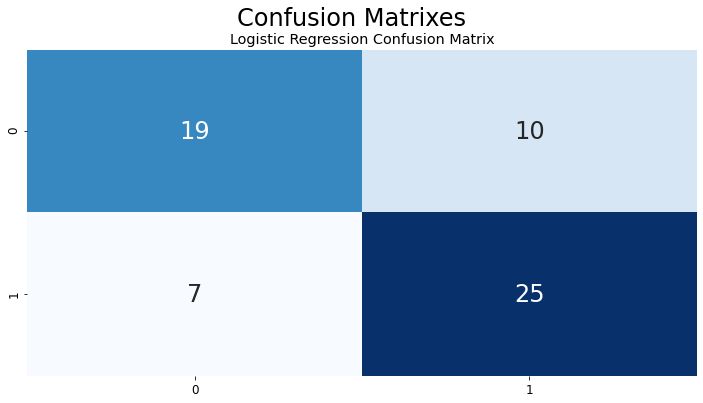

In [0]:
plt.figure(figsize=(12,6))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,1,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_matrix,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

Compared with the diagonal element, the off-diagonal element has a smaller value, which indicates that the effect is better.

In this case, we get:

True positive is 19
True negative is 3
False positive is 10
False negative is 29
Thus, we have 19+29 = 48 correct predictions, 3+10 = 13 wrong predictions.

Accuracy = (True positive + True negative)/total = (19+29)/61 = 79%

Diagnostic tests are often sold, marketed, cited and used with sensitivity and specificity as the headline metrics.

Let's see what this model is giving,



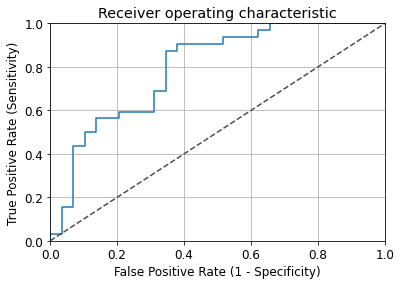

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('Receiver operating characteristic')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

0.90 - 1.00 = excellent

0.80 - 0.90 = good

0.70 - 0.80 = fair

0.60 - 0.70 = poor

0.50 - 0.60 = fail

Let's see what the above ROC gives us,

In [0]:
auc(fpr, tpr)

0.7931034482758621

The **AUC** value for **Random Forest** method is **0.7716**

Indicators for the performance of **Random Forest**:

- The Accuracy of Random Forest is 0.7705

- The F1 Value of Random Forest is 0.76709

- The AUC value for Random Forest is 0.78879

### KNN

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

'k' in KNN is a parameter that refers to the number of nearest neighbours to include in the majority of the voting process.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

At first, we assume that k = 2, and then calculate the accuracy value for reference. 

In [0]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("When k = {}, the KNN Accuracy Score is: {:.2f}%".format(2, knn.score(X_test, y_test)*100))

When k = 2, the KNN Accuracy Score is: 78.69%


Then, we need to find the best k value to conclude the maximum KNN score.

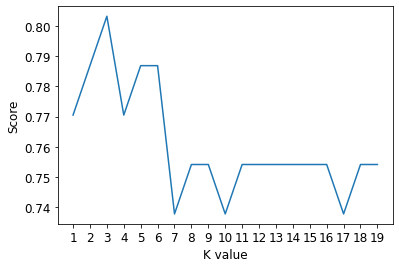

The Maximum KNN Score is 80.33%


In [0]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

accuracies = {}
acc_ = max(scoreList)*100
accuracies['KNN'] = acc_
print("The Maximum KNN Score is {:.2f}%".format(acc_))

Thus, The maximum **accuracy** of KNN is 80.33% when k equals to 3.

**Classification Report**

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In order to seek a balance between Precision and Recall, we need to calculate the value of F1, which can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0.

We can see from the report that the **F1-score** is 0.79

**Confusion Matrix**

[[24  5]
 [ 8 24]]


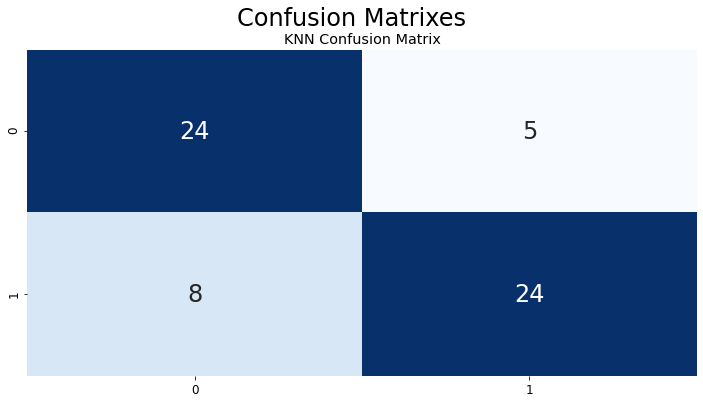

In [0]:
print(confusion_matrix(y_test, prediction))
plt.figure(figsize=(12,6))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,1,1)
plt.title("KNN Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, prediction),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

From the confusion matrix, we learn that:

True positive is 24

True negative is 24

False positive is 5

False negative is 8

Thus, we have 24+24 = 48 correct predictions and 5+8 = 13 wrong predictions.

Accuracy = (True positive + True negative)/total = (24+24)/61 = 78.69%

Misclassification Rate = (False positive + False negative)/total = (5+8)/61 = 21.31%

Precision = True positive/(True positive + False positive) = 24/(24+5) = 82.76%

Recall = True positive/(True positive + False negative) = 24/(24+8) = 75%

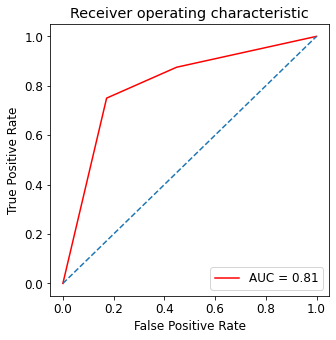

In [0]:
from sklearn.metrics import roc_curve

y_proba=knn.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(5,5))
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.axis('tight')
plt.title('Receiver operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Since we have got the confusion matrix, then we can plot the AUC - ROC curve to measure the performance for classification problem. In other words, we can predict how much model is capable of distinguishing between classes. 

Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

From the result, we got the AUC value equals to 0.81 which is quite near 1. We can say that the KNN model has a good measure of separability.

Indicators for the performance of **KNN method**:
*   The Accuracy of KNN is 0.80

*   The F1 Score of KNN is 0.79

*   The AUC value for KNN is 0.81

### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
acc = clf.score(X_test,y_test)*100
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 73.77%


The accuracy of the Logistic Regression is 73.77%

**Classification Report**

In [0]:
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70        29
           1       0.72      0.81      0.76        32

    accuracy                           0.74        61
   macro avg       0.74      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



F1-score is 0.74 and the accuracy is 0.74.

**Confusion Matrix**

[[19 10]
 [ 6 26]]


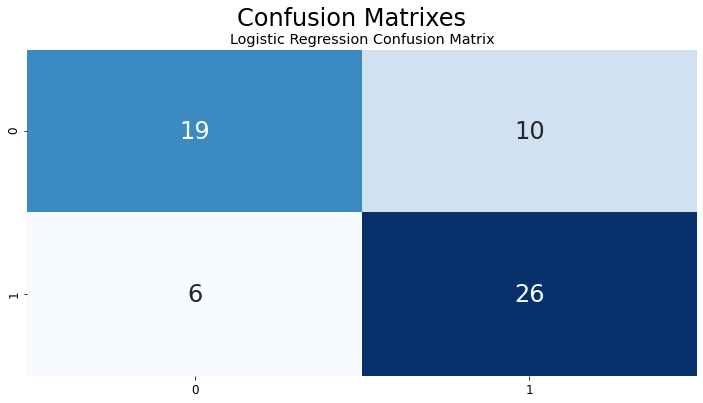

In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(12,6))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,1,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In this case, we get:

*   True positive is 19
*   True negative is 26
*   False positive is 10
*   False negative is 6

Thus, we have 19+26 = 45 correct predictions, 10+6 = 16 wrong predictions.

Accuracy = (True positive + True negative)/total 
= (19+26)/61 = 73.77%

Error rate = (False positive + False negative)/total 
= (10+6)/61 = 26.23%






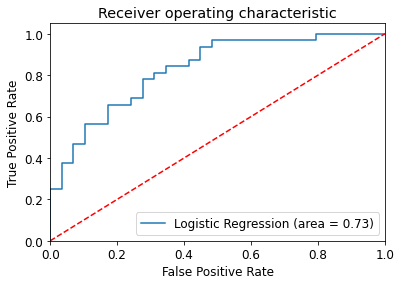

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The red dotted line represents the ROC of a purely random classifier, since the blue line is far away from the red dotted line, it is a good classfier. 

Indicators for the performance of **Logistic Regression**:
*   The Accuracy of LR is 0.74

*   The F1 Score of LR is 0.74

*   The AUC value for LR is 0.73

## Discussion

As we can see from the comparison between key performance indicators from the four algorithms our team used, obviously the KNN achieved the most accurate result.​

To analyze the factors behind our overall performance, we found that:​

The data source on Kaggle only contains 14 of 76 attributes in the original database. So, we just used a subset of 14 of them. This may explain the reason why we cannot achieve a fairly high performance.​

Also, to figure out why KNN achieved the relatively high performance over the rest of methods, we noticed that:​

On the one hand, It might be the case that random forests are not good at extrapolating. So they have poor performance when new test data has variable ranges they haven't been trained on. ​

Also, SVMs do not perform well on highly imbalanced data sets. They are also not a good option specially if we have multiple classes. And SVMs are not efficient if the number of features are very huge in number compared to the training samples.​

What's more, we learn that logistic regression can’t solve non-linear problems since it’s decision surface is linear.  Another disadvantage is its high reliance on a proper presentation of the data. This means that logistic regression is not a useful tool unless we have already identified all the important independent variables. Since its outcome is discrete, Logistic Regression can only predict a categorical outcome.​

On the other hand, indeed since the dimensionality of our dataset is not complicated and KNN can detect linear or non-linear distributed data, it tends to perform very well with a lot of data points as we have in our project.​

## **Reference:**

Kralmachine. “Analyzing the Heart Disease.” Kaggle. Kaggle, July 5, 2019.

https://www.kaggle.com/kralmachine/analyzing-the-heart-disease.

“Python Sklearn ︱分类效果评估--Acc、Recall、F1、ROC、回归、距离.” python sklearn ︱分类效果评估--acc、recall、F1、ROC、回归、距离_Python_素质云笔记/Recorder...-CSDN博客. Accessed April 7, 2020. 

https://blog.csdn.net/sinat_26917383/article/details/75199996.

tentotheminus9. “What Causes Heart Disease? Explaining the Model.” Kaggle. Kaggle, March 4, 2019. 

https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model.

Li, Susan. “Building A Logistic Regression in Python, Step by Step.” Medium, Towards Data Science, Feb, 27. 2019. 

http://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8.

Walia, Anish Singh. “Logistic Regression in Python.” Medium, Medium, Apr, 8. 2020. 

http://medium.com/@anishsingh20/logistic-regression-in-python-423c8d32838b.

Harrison, Onel. "Machine Learning Basics with the K-Nearest Neighbors Algorithm." Medium, Towards Data Science, Sep 10, 2018. 

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

Srivastava, Tavish. "Introduction to k-Nearest Neighbors: A powerful Machine Learning Algorithm. (with implementation in Python & R)" Analytics Vidhya, March 26, 2018. 

https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

Narkhede, Sarang. "Understanding Confusion Matrix." Medium, Towards Data Science, May 9, 2018. 

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
